In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 제조사별 비타민 함유량 차이 분석

각 시리얼 식품과 관련된 영양소 등 데이터를 분석하시오

data: `cereal.csv`

In [2]:
df = # 코드입력
df

name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0     5.0       6     280        25      3     1.0  0.33  68.402973  
1     8.0       8     135         0      3     1.0  1.00  33.983679  
2     7.0       5     320        25      3     1.0  0.33  59.425505  
3     8.0       0     330        25      3     1.0  0.50  93.704912  
4    14.0       8      -1        25      3     1.0  0.75  34.384843  
..    ...     ...     ...       ...    ...     ...   ...        ...  
72   21.0       3      60        25      3     1.0  0.75  39.106174  
73   13.0      12      25        25      2     1.0  1.00  27.753301  
74   17.0       3     115        25      1     1.0  0.67  49.787445  
75   17.0       3     110        25      1     1.0  1.00  51.592193  
76   16.0       8      60        25      1     1.0  0.75  36.187559  

[77 rows x 16 columns]

In [3]:
df.# 코드입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


'mfr'의 분포 확인

In [4]:
df['mfr'].# 코드입력

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

## 스케일 변환

vitamins 컬럼에 대한 z-sclae 변환

In [5]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler

scaler = # 코드입력
vitamin_scaled = scaler.# 코드입력

In [6]:
df['vitamin_scaled'] = vitamin_scaled

```
'mfr'에 따라 'vitamins'의 평균값에 차이가 있는지(양측검정)를 검정하고자 한다. 'mfr'이 'K', 'G'인 경우만을 필터한 후 다음 질문에 답하시오
```

In [7]:
K = # 코드입력
G = # 코드입력

## Q 1-1

```
mfr’에 따라 'vitamins'의 평균값에 차이가 있는지(양측검정)를 검정하고자 한다. 

'vitamins'은 정규분포를 따르며, 'mfr'별로 등분산(std error 같다)임을 가정할 때, 적절한 방법으로 가설을 검정할 때, 유의확률(p-value)을 구하시오. 소수점 다섯째 자리에서 반올림 하여 넷째 자리까지 기술하시오.
(답안예시) 0.1234
```

In [8]:
K.mean(), G.mean()

(0.2944481303071025, 0.31448077848134376)

2개의 샘플에 대한 평균 값 차이 양측검정(Two-Tailed Test)는 scipy.stats의 ttest_ind를 사용한다

[ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): Calculate the T-test for the means of two independent samples of scores.

In [9]:
from scipy.stats import ttest_ind

####
# Parameters
# a, b: 두 집단
# equal_var: 두 집단의 variance가 같은지, 다른지를 측정함. True일 경우는 같다고, False일 경우에는 다르다고 하며, 다른 테스트를 수행함.
####
p_value = ttest_ind(a=K, 
                    b=G, 
                    equal_var=True # same std error
                   ).pvalue

print(f"p_value  : {p_value:.4f}")

p_value  : 0.9547


p-value 값이 H1을 기각하므로, H0를 채택한다. 

즉 평균 값은 같다

**정답: 0.9547**

## Q 1-2

```
'mfr'별 'vitamins'이 정규분포를 따르는지 정규성 검정을 수행하고, 정규분포를 따르는지의 여부에 따라 다음의 가설을 검정하고 유의확률을 구하시오. 소수점 다섯째 자리에서 반올림 하여 넷째 자리까지 기술하시오.

-	정규분포를 따른다면, 다음의 가설을 검정한다. 
H1 : ‘mfr’에 따라 'vitamins' 모집단의 평균이 다르다. (μ1≠μ2)

-	정규분포를 따르지 않는다면, 다음의 가설을 검정한다.
H1 : ‘mfr’에 따라 'vitamins' 모집단의 중위수가 다르다. (M1≠M2)

Note. Kolmogorov-Smirnov test로 정규성 검정을 수행한다.
(답안예시) 0.1234
```

**Normality Test**

회귀 분석 등에서는 확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성 검정(normality test)이라고 한다. 정규성 분포 그 중요도 만큼 여러가지 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에도 statsmodels 패키지에도 다양한 정규성 검정 명령어를 제공한다.

**Kolmogorov-Smirnov test**

[scipy.stats.kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

In [10]:
# K에 대한 Normality Test
print( # 코드입력 )

# G에 대한 Normality Test
print( # 코드입력 )

KstestResult(statistic=0.4418540727001831, pvalue=0.0001312696986065654)
KstestResult(statistic=0.4418540727001831, pvalue=0.00019770389169499679)


p-value는 0.05보다 작을 때 H1이 채택되므로, 즉 K, G는 **정규분포가 아니다**

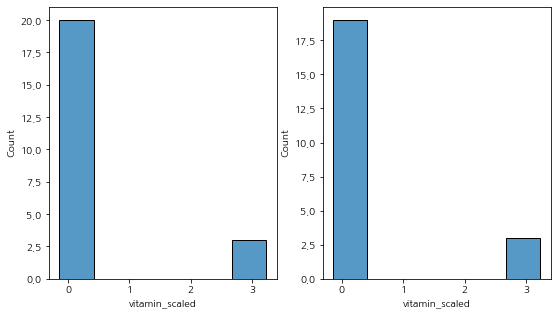

In [11]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(9, 5)
sns.histplot(K, ax=axes[0])
sns.histplot(G, ax=axes[1])
plt.show()

```
정규분포를 따르지 않는다면, 다음의 가설을 검정한다.
H1 : ‘mfr’에 따라 'vitamins' 모집단의 중위수가 다르다. (M1≠M2)
```

**중위수 검정**

비모수 중위수 검정으로는 Mann-Whitney Test를 사용한다.

[scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [12]:
# 중위수 검정
pvalue = # 코드입력
f'p-value: {pvalue:.4f}'

'p-value: 0.4846'

**정답: 0.4846**

## Q 2-1

```
'mfr' (K,G,others로 구성)에 따라 'vitamins'의 평균값에 차이가 있는지(양측검정)를 검정하고자 한다.
```

In [13]:
df['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [14]:
# 'mfr' (K,G,others로 구성)
def convert_mfr(x):
    # 코드입력
    
    

In [15]:
df['mfr_clean'] = df['mfr'].# 코드입력
df['mfr_clean'].value_counts()

others    32
K         23
G         22
Name: mfr_clean, dtype: int64

In [16]:
# K, G, Others 샘플 구성
K = # 코드입력
G = # 코드입력
Others = # 코드입력

```
'mfr' 에 따라 'vitamins'의 평균값에 차이가 있는지(양측검정)를 검정하고자 한다. 
'vitamins'은 정규분포를 따르며 'mfr'별로 등분산임을 가정하여 적절한 방법으로 가설을 검정하고, 유의확률을 구하시오. 

소수점 다섯째 자리에서 반올림 하여 넷째 자리까지 기술하시오.
(답안예시) 0.1234
```

샘플이 3개 이상일 경우 One-way ANOVA Test를 사용한다.

[scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

H1: 3개의 샘플의 평균이 같지 않다

In [17]:
# 'mfr' 에 따라 'vitamins'의 평균값에 차이가 있는지(양측검정)를 검정
# One-way ANOVA Test
pvalue= # 코드입력
f'p-value: {pvalue:.4f}'

'p-value: 0.0057'

**정답: 0.0057**

## Q 2-2

```
'mfr'별 'vitamins'이 정규분포를 따르는지 정규성 검정을 수행하고, 정규분포를 따르는지의 여부에 따라 다음의 가설을 검정하고 유의확률을 구하시오. 소수점 다섯째 자리에서 반올림 하여 넷째 자리까지 기술하시오.
```

In [19]:
# K에 대한 Normality Test
print(  # 코드입력   )

# G에 대한 Normality Test
print(  # 코드입력   )

# Other에 대한 Normality Test
print(  # 코드입력   )

KstestResult(statistic=0.4418540727001831, pvalue=0.0001312696986065654)
KstestResult(statistic=0.4418540727001831, pvalue=0.00019770389169499679)
KstestResult(statistic=0.5581459272998168, pvalue=6.458520793491994e-10)


pvalue가 모두 0.05보다 작다.

즉, H1이 채택 되므로, Normality 하지 않다가 채택

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


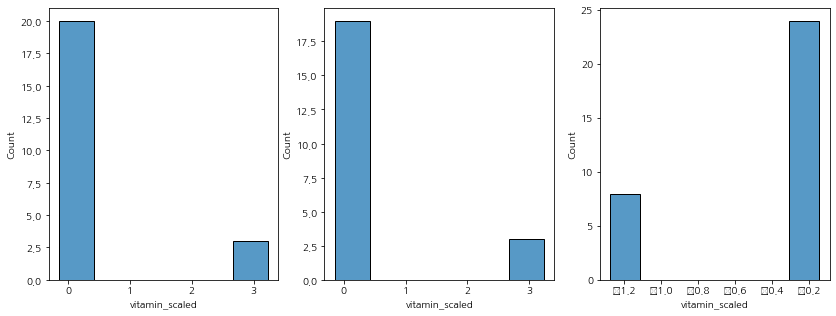

In [20]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(14, 5)
sns.histplot(K, ax=axes[0])
sns.histplot(G, ax=axes[1])
sns.histplot(Others, ax=axes[2])
plt.show()

```
-	정규분포를 따른다면, 다음의 가설을 검정한다. 
H1 : ‘mfr’에 따라 'vitamins' 모집단의 평균이 모두 같지는 않다. 즉 적어도 하나의 모집단 평균값은 다른 모집단 평균값들과는 다르다. Not (μ1=μ2=μ3)

-	정규분포를 따르지 않는다면, 다음의 가설을 검정한다.
H1 : ‘mfr’에 따라 'vitamins' 모집단의 중위수가 모두 같지는 않다. 즉 적어도 하나의 모집단 중앙값은 다른 모집단 중앙값들과는 다르다. Not (M1=M2=M3)

Note. Kolmogorov-Smirnov test로 정규성 검정을 수행한다.
(답안예시) 0.1234
```

3개의 샘플에 대한 중위성 검증은 Kruskal-Wallis H-test를 사용한다.

[scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

H1: 3개 샘플에 대한 중위값이 다르다.

In [21]:
# Kruskal-Wallis H-test
pvalue= # 코드입력
f'p-value: {pvalue:.4f}'

'p-value: 0.0005'

**정답: 0.0005**